In [66]:
import numpy as np
from numpy import pi, sin, cos, unwrap, angle, diff
from scipy.signal import hilbert, windows, chirp
import matplotlib.pyplot as plt

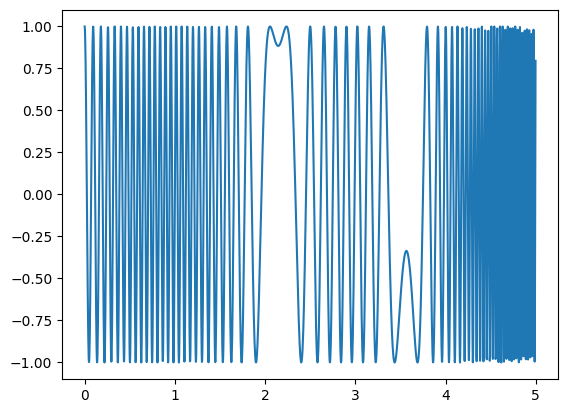

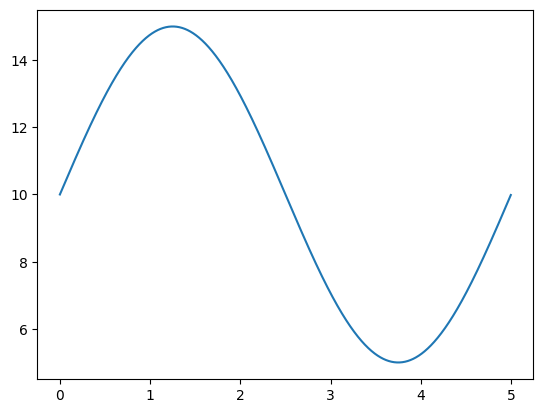

In [71]:
fs = 400
T = 5
samples = int(fs*T)
t = np.arange(samples)/fs
f = 10 + 5*sin(2*pi*(1/5)*t)
signal = cos(2*pi*f*t)
plt.plot(t,signal)
plt.show()
plt.plot(t,f)
plt.show()

In [68]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *=  1 + 0.5*sin(2.0*pi*3.0*t)
f = np.linspace(20.0, 100.0, len(t))

In [69]:
def IF(x):
    sa = hilbert(x)
    ip = unwrap(angle(sa))
    iw = diff(ip)
    return np.append(iw, iw[-1])
    

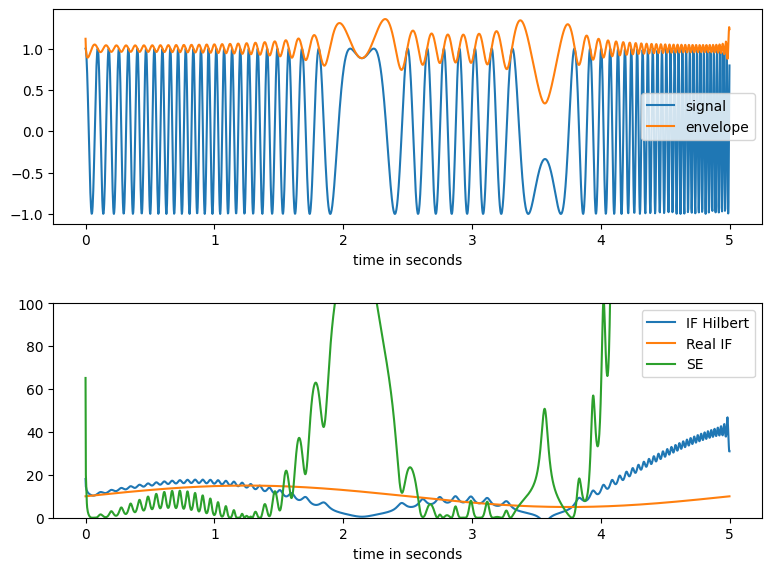

In [72]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (IF(signal) / (2.0*np.pi)) * fs

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1.plot(t, instantaneous_frequency, label='IF Hilbert')
ax1.plot(t, f, label='Real IF')
ax1.plot(t, np.square(instantaneous_frequency - f), label='SE')
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 100)
ax1.legend()
fig.tight_layout()
fig.set(figheight=6, figwidth=8)
plt.show()
